# AWS Workshop Python module

## Setup of the environment

In this workshop, we will be exploring some TCGA data in an iPython notebook. Before analysis, the followin python modules will need to be installed:
* numpy
* matplotlib
* sklearn
* pandas
* unidip
* lifelines

[Numpy](http://www.numpy.org/) is a scientific computing package for Python. It is very useful for rapid linear algebra calculation, N-dimensional array object handling, amongst many other features.

[Matplotlib](https://matplotlib.org/) is the major 2D plotting library for Python. It is the basis for many other toolkits to build their plots from - such as Pandas, scipy, sklearn, etc.

[scikit-learn](https://scikit-learn.org/) is a large comprehensive library of data science alorithms. Clustering, prediction, preprocessing, classification, etc. It is also a great resource for learning how various data analysis algorithms work and when is best to use them.

[Pandas](https://pandas.pydata.org/) is a library that provides R-like DataFrames in Python for working with data. It creates an easier environment for organizing and accessing data in a Python environment, which can be input into common statistical modeling tools such as [statsmodels](https://www.statsmodels.org/) and scikit-learn.

[UniDip](https://github.com/BenjaminDoran/unidip) is a small python package used here for quickly determining estimated modality of the gene expressions.

[Lifelines](https://github.com/CamDavidsonPilon/lifelines) is a small python package that extends Pandas while using a scikit-learn style in usage. It extends Pandas to add survival analysis tools that are missing from the greater Python ecosystem.

You can easily install the necessary dependencies/packages on your AWS instance with the following command:

```bash
pip3 install numpy matplotlib sklearn pandas unidip lifelines
```

In [8]:
# Importing necessary Python modules
import numpy as np
import pandas as pd
import lifelines

from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from unidip import UniDip
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Importing the gene expression data for samples
fpkm = pd.read_csv("fpkm.tsv", sep="\t", index_col=0)
display(fpkm)

,TCGA-B6-A0IM,TCGA-B6-A0X4,TCGA-BH-A1FR,TCGA-E2-A14Z,TCGA-BH-A1EV,TCGA-B6-A0X1,TCGA-BH-A18V,TCGA-EW-A1P8,TCGA-PE-A5DC,TCGA-BH-A1F8,...,TCGA-AO-A03U,TCGA-BH-A18L.1,TCGA-BH-A1FM.1,TCGA-AC-A2FE,TCGA-C8-A3M7,TCGA-B6-A0RL,TCGA-B6-A0IE,TCGA-BH-A18R.1,TCGA-E2-A15M.1,TCGA-AR-A2LH
gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000198899.2,3432.370382,3543.312816,4197.931152,4838.326004,5636.253785,1562.905070,2836.601625,3209.458838,6676.977336,5167.657382,...,2409.137597,5028.059536,7982.345080,2710.370209,5570.688730,4317.141853,6499.466869,7348.094145,6522.421278,3181.479037
ENSG00000163697.15,12.905478,15.023212,10.060872,13.958740,8.094482,4.073478,3.207257,4.085840,11.052681,8.276948,...,5.631514,15.928047,14.664114,11.798072,9.969294,6.366629,7.781975,11.552724,10.510417,4.392180
ENSG00000244044.3,0.000000,0.000000,0.081743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.056106,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000196169.13,0.002170,0.004549,0.431674,0.098149,0.077876,0.208806,0.054260,0.027391,0.153729,0.383820,...,0.041393,0.482214,0.002639,0.207868,0.203333,0.008430,0.187433,0.457876,0.328244,0.994548
ENSG00000223321.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044951,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000255157.1,0.000000,0.000000,0.099454,0.000000,0.000000,0.000000,0.055440,0.000000,0.000000,0.000000,...,0.051197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000206759.1,0.114404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.252891,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000226939.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000067369.12,12.599330,6.798126,5.074760,4.051190,7.685165,5.359047,7.560737,3.826431,4.468622,4.211683,...,3.837234,4.922027,1.962396,5.078656,4.626940,6.854506,1.815084,6.434966,4.517437,4.434824


In [9]:
# Import the clinical data for samples
clinical = pd.read_csv("clinical.tsv", sep="\t", index_col=0)
display(clinical)

,primary_diagnosis,tumor_stage,days_to_death
submitter_id,,,
TCGA-GM-A2D9,"Infiltrating duct carcinoma, NOS",stage i,1812.0
TCGA-B6-A0IB,"Infiltrating duct carcinoma, NOS",stage iv,3941.0
TCGA-AQ-A7U7,"Lobular carcinoma, NOS",stage iiia,584.0
TCGA-GM-A2DA,"Infiltrating duct carcinoma, NOS",stage iib,6593.0
TCGA-AC-A2FM,"Lobular carcinoma, NOS",stage iib,792.0
TCGA-BH-A1FL,"Infiltrating duct carcinoma, NOS",stage iib,1673.0
TCGA-BH-A18K,"Infiltrating duct carcinoma, NOS",stage i,2763.0
TCGA-BH-A1FJ,"Infiltrating duct carcinoma, NOS",stage iiia,1927.0
TCGA-A7-A13E,"Infiltrating duct carcinoma, NOS",stage iib,614.0


## Identifying potential multi-modal gene expressions

In the provided gene expression set (**fpkm**), we first would like to identify any genes that display a potential multi-modal distribution. To do so quickly, we are using the UniDip python package, which invokes [Skinny-dip](https://www.kdd.org/kdd2016/papers/files/rfp0008-maurusA.pdf) - with Skinny-dip being based on the [Dip Test](https://www.stat.washington.edu/wxs/Stat593-s03/Literature/hartigan85a.pdf).


In [10]:
# First, we define a method for getting the estimated number of clusters.
# This method will be run individually on each row with Panda's apply function.
def est_num_clust(row):
    return len(UniDip(row).run())

fpkm_clusts = fpkm.apply(est_num_clust, axis=1)
#display(fpkm_clusts)

# Next, we filter the genes for bimodal distributions
fpkm_bimodal = fpkm.loc[fpkm_clusts == 2]
display(fpkm_bimodal)

,TCGA-B6-A0IM,TCGA-B6-A0X4,TCGA-BH-A1FR,TCGA-E2-A14Z,TCGA-BH-A1EV,TCGA-B6-A0X1,TCGA-BH-A18V,TCGA-EW-A1P8,TCGA-PE-A5DC,TCGA-BH-A1F8,...,TCGA-AO-A03U,TCGA-BH-A18L.1,TCGA-BH-A1FM.1,TCGA-AC-A2FE,TCGA-C8-A3M7,TCGA-B6-A0RL,TCGA-B6-A0IE,TCGA-BH-A18R.1,TCGA-E2-A15M.1,TCGA-AR-A2LH
gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000240874.1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045933,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103194,0.047949,0.000000
ENSG00000266047.1,0.000000,0.0,0.271239,0.000000,0.000000,0.311223,0.000000,0.000000,0.000000,0.000000,...,0.279256,0.222342,0.000000,0.000000,0.186168,0.000000,0.000000,0.503069,0.000000,0.000000
ENSG00000224050.1,0.373462,0.0,0.323648,0.000000,0.028632,1.067654,0.112759,0.145464,0.000000,0.045863,...,0.000000,0.066326,1.639582,0.026146,0.305442,0.000000,0.024885,0.150068,0.000000,0.222131
ENSG00000225082.2,0.132100,0.0,0.000000,0.073749,0.000000,0.197033,0.047862,0.493950,0.000000,0.000000,...,0.000000,0.000000,0.107067,0.000000,0.235724,0.171016,0.211256,0.053082,0.000000,0.000000
ENSG00000236592.5,0.039235,0.0,0.000000,0.065712,0.000000,0.087781,0.000000,0.055015,0.063158,0.086729,...,0.000000,0.000000,0.095400,0.049442,0.052509,0.000000,0.000000,0.000000,0.065929,0.084011


In [11]:
# Plot the histograms of each gene
# We transpose the matrix, as DataFrame.hist() expects data
# in the columns for groupings
# Pandas will automatically create a matrix of plots
fpkm_bimodal.transpose().hist();

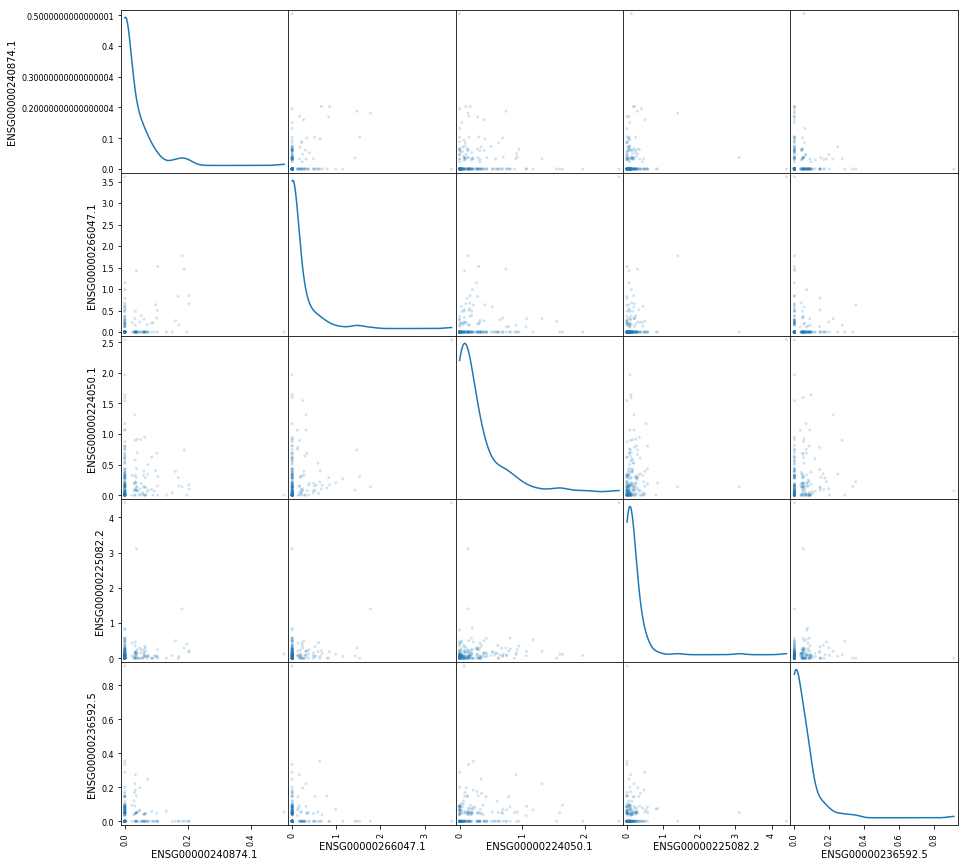

In [12]:
# Additionally, do we see any correlations between any of the genes.
# Again Pandas will handle creating the matrix of plots.
# And again, we need to transpose the DataFrame
scatter_matrix(fpkm_bimodal.transpose(), alpha = 0.2, diagonal = 'kde', figsize = (15, 15));

## Combining the gene expression data with clinical data

ENSG00000225082.2 looks to be an interesting example. So we will continue onward with investigating whether this gene could be correlated with clinical features or outcomes. We will investigate two aspects:
* Do the gene expression clusters show a significant impact on survival?
* Do the gene expression values show differences in tumor stage?

In [59]:
# First we join the DataFrames so that the selected gene expression data
# is combined with the clinical data.
# In this case, I am specifically only joining ENSG00000225082.2
fpkm_onegene = fpkm_bimodal.loc["ENSG00000225082.2"]
clinical_joined = clinical.join(fpkm_onegene)
# Let's clean the samples that lack gene expression data
clinical_joined = clinical_joined.rename(columns={"ENSG00000225082.2": "fpkm"})
clinical_joined = clinical_joined.dropna(subset=["fpkm"])
# And let's clean a sample that lacks a value in days_to_death
clinical_joined[clinical_joined.days_to_death != "--"]

display(clinical_joined)

,primary_diagnosis,tumor_stage,days_to_death,fpkm
submitter_id,,,,
TCGA-GM-A2D9,"Infiltrating duct carcinoma, NOS",stage i,1812.0,0.000000
TCGA-B6-A0IB,"Infiltrating duct carcinoma, NOS",stage iv,3941.0,0.283074
TCGA-AQ-A7U7,"Lobular carcinoma, NOS",stage iiia,584.0,0.487324
TCGA-GM-A2DA,"Infiltrating duct carcinoma, NOS",stage iib,6593.0,0.000000
TCGA-AC-A2FM,"Lobular carcinoma, NOS",stage iib,792.0,0.000000
TCGA-BH-A1FL,"Infiltrating duct carcinoma, NOS",stage iib,1673.0,0.360923
TCGA-BH-A18K,"Infiltrating duct carcinoma, NOS",stage i,2763.0,0.176580
TCGA-BH-A1FJ,"Infiltrating duct carcinoma, NOS",stage iiia,1927.0,0.351647
TCGA-A7-A13E,"Infiltrating duct carcinoma, NOS",stage iib,614.0,0.000000


In [60]:
# We shall look to see if there is a survival difference between the two clusters.
# First, we must cluster the data. We will use K-means to identify the two clusters of data

# Initializing KMeans
kmeans = KMeans(n_clusters = 2)
# Fitting with inputs
kmeans = kmeans.fit(np.array(clinical_joined["fpkm"]).reshape(-1, 1))
# Now let us add the cluster information to the Data Frame
clinical_joined["cluster"] = kmeans.labels_
display(clinical_joined)

,primary_diagnosis,tumor_stage,days_to_death,fpkm,cluster
submitter_id,,,,,
TCGA-GM-A2D9,"Infiltrating duct carcinoma, NOS",stage i,1812.0,0.000000,1
TCGA-B6-A0IB,"Infiltrating duct carcinoma, NOS",stage iv,3941.0,0.283074,0
TCGA-AQ-A7U7,"Lobular carcinoma, NOS",stage iiia,584.0,0.487324,0
TCGA-GM-A2DA,"Infiltrating duct carcinoma, NOS",stage iib,6593.0,0.000000,1
TCGA-AC-A2FM,"Lobular carcinoma, NOS",stage iib,792.0,0.000000,1
TCGA-BH-A1FL,"Infiltrating duct carcinoma, NOS",stage iib,1673.0,0.360923,0
TCGA-BH-A18K,"Infiltrating duct carcinoma, NOS",stage i,2763.0,0.176580,1
TCGA-BH-A1FJ,"Infiltrating duct carcinoma, NOS",stage iiia,1927.0,0.351647,0
TCGA-A7-A13E,"Infiltrating duct carcinoma, NOS",stage iib,614.0,0.000000,1


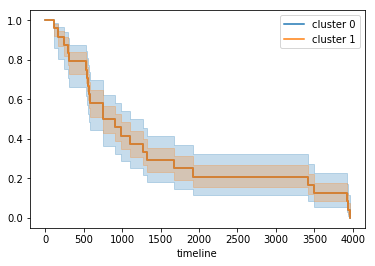

In [89]:
# Here we will fit the cluster data to a survival curve

# Cluster 0
f = clinical_joined.cluster==0
T = list(clinical_joined[f]['days_to_death'])
T = [float(s) for s in T if s != "--"] # convert the string to float
# Cluster 1
f2 = clinical_joined.cluster==0
T2 = list(clinical_joined[f]['days_to_death'])
T2 = [float(s) for s in T2 if s != "--"] # convert the string to float

# Plot the survival curve
ax = plt.subplot(111)
kmf0 = KaplanMeierFitter()
ax = kmf0.fit(T, label="cluster 0", alpha=0.2).plot(ax=ax)
kmf1 = KaplanMeierFitter()
ax = kmf1.fit(T2, label="cluster 1", alpha=0.5).plot(ax=ax)

Finally, we can try seeing if certain tumor stages deviate significantly from the other stages based on gene expression. We will visualize this with a boxplot. Pandas makes this very simple.

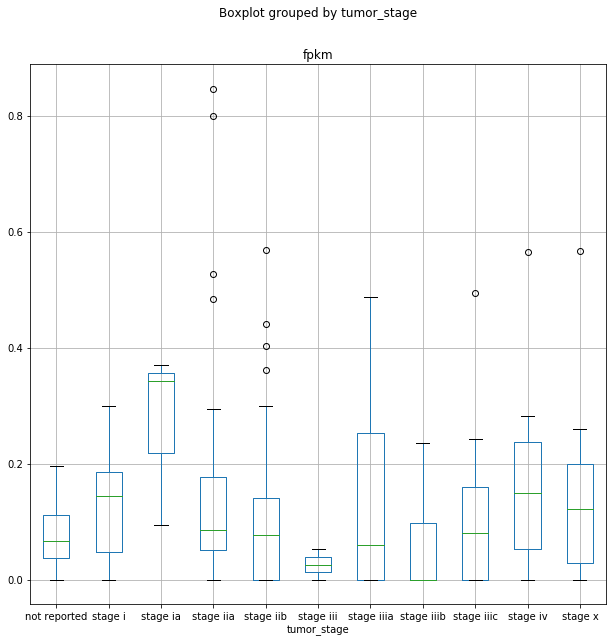

In [93]:
# Plot the boxplot of 'fpkm' values grouped by 'tumor_stage'
clinical_joined.boxplot(column=['fpkm'], by='tumor_stage', figsize=(10,10));

Unfortunately, our analyzes failed to show a noticeable effect in survival or tumor stage for **ENSG00000225082.2**, but with Python and the iPython notebook, we can rapidly analyze the data to hopefully find something that does.